In [1]:
from maelzel.core import *
from maelzel.music import lilytools
import logging
logging.getLogger("maelzel").setLevel("DEBUG")

In [2]:
cfg = getConfig()
cfg['.quant.debug'] = True
cfg['quant.nestedTuplets'] = True


[maelzel.core:mobj.py:1844:resetImageCache:INFO] Resetting image cache


Beat: 0 - 1/2 (dur: 1/2)
Best 2 divisions: (quantized in 704.3µs)


error,div,snapped,slots,info
0.0000,"(3,)","[«4C# 0:0.333 1/3♩», «4D~ 0.333:0.5 1/6♩»]","[0, 2]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1636,"(5,)","[«4C# 0:0.3 3/10♩», «4D~ 0.3:0.5 1/5♩»]","[0, 3]","gridError=0.164, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1/2 - 1 (dur: 1/2)
Best 2 divisions: (quantized in 205.0µs)


error,div,snapped,slots,info
0.0000,"(3,)","[«~4D 0:0.167 1/6♩», «4E 0.167:0.5 1/3♩»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1636,"(5,)","[«~4D 0:0.2 1/5♩», «4E 0.2:0.5 3/10♩»]","[0, 2]","gridError=0.164, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(3/2, 
  «4C# 0:0.333 1/3♩ 3/2»
  «4D~ 0.333:0.5 1/6♩ 3/2»
)
    Node(3/2, 
  «~4D 0.5:0.667 1/6♩ 3/2»
  «4E 0.667:1 1/3♩ 3/2»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(3/2, 
  «4C# 0:0.333 1/3♩ 3/2»
  «4D 0.333:0.667 1/3♩ 3/2»
  «4E 0.667:1 1/3♩ 3/2»
)
[maelzel:lilytools.py:192:findLilypond:DEBUG] findLilypond: searching via shutil.which
[maelzel:lilytools.py:195:findLilypond:DEBUG] ... found! lilypond path: /home/em/.local/bin/lilypond
[maelzel.scoring:renderlily.py:1141:write:DEBUG] Rendering lilypond '/home/em/.cache/tmpeo0lvhnr/kjcokibg.ly' to '/home/em/.cache/tmpeo0lvhnr/kjcokibg.png'
[maelzel:lilytools.py:333:renderLily:DEBUG] Rendering lilypond '/home/em/.cache/tmpeo0lvhnr/kjcokibg.ly' to '/home/em/.cache/tmpeo0lvhnr/kjcokibg.png'
[maelzel:lilytools.py:192:findLilypond:DEBUG] findLilypond: searching via shutil.which
[maelzel:lilytools.py:195:findLilypond:DEBUG]

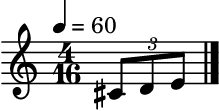

In [3]:
v1 = Voice([
    Note("4C#", F(1, 3)),
    Note("4D", F(1, 3)),
    Note("4E", F(1, 3)),
])

with ScoreStruct(timesig=(4, 16)):
    v1.show()

[maelzel.scoring:quant.py:1364:quantizeMeasure:DEBUG] Measure 4/4 is not filled (events=[«4C 0:0.111 1/9♩», «4C# 0.111:0.222 1/9♩», «4D 0.222:0.333 1/9♩», «4D# 0.333:0.444 1/9♩», «4E 0.444:0.556 1/9♩», «4F 0.556:0.667 1/9♩», «4F# 0.667:0.778 1/9♩», «4G 0.778:0.889 1/9♩», «4G# 0.889:1 1/9♩», «4A 1:1.111 1/9♩», «4A# 1.111:1.222 1/9♩», «4B 1.222:1.333 1/9♩»]). Filling gaps with silences
[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (9, 6), divPenalty=0.0509902 * 0.1 > minError=0.005
[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (6, 9), divPenalty=0.0509902 * 0.1 > minError=0.005
[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (8, 9), divPenalty=0.0509902 * 0.1 > minError=0.005
[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (9, 8), divPenalty=0.0509902 * 0.1 > minError=0.005


Beat: 0 - 1 (dur: 1)
Best 6 divisions: (quantized in 40.9ms)


error,div,snapped,slots,info
0.0030,"(3, 3, 3)","[«4C 0:0.111 1/9♩», «4C# 0.111:0.222 1/9♩», «4D 0.222:0.333 1/9♩», «4D# 0.333:0.444 1/9♩», «4E 0.444:0.556 1/9♩», «4F 0.556:0.667 1/9♩», «4F# 0.667:0.778 1/9♩», «4G 0.778:0.889 1/9♩», «4G# 0.889:1 1/9♩»]","[0, 1, 2, 3, 4, 5, 6, 7, 8]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0050,"(9,)","[«4C 0:0.111 1/9♩», «4C# 0.111:0.222 1/9♩», «4D 0.222:0.333 1/9♩», «4D# 0.333:0.444 1/9♩», «4E 0.444:0.556 1/9♩», «4F 0.556:0.667 1/9♩», «4F# 0.667:0.778 1/9♩», «4G 0.778:0.889 1/9♩», «4G# 0.889:1 1/9♩»]","[0, 1, 2, 3, 4, 5, 6, 7, 8]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.05 (0.0005, divPenalty=0.05, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.3685,"(8,)","[«4C 0:0.125 1/8♩», «4C# 0.125:0.25 1/8♩», «4D 0.25:0.375 1/8♩», «4D# 0.375:0.5 1/8♩», «4E 0.5:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 9)}», «4F 0.5:0.625 1/8♩», «4F# 0.625:0.75 1/8♩», «4G 0.75:0.875 1/8♩», «4G# 0.875:1 1/8♩»]","[0, 1, 2, 3, 4, 4, 5, 6, 7]","gridError=0.368, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.4182,"(7,)","[«4C 0:0.143 1/7♩», «4C# 0.143:0.286 1/7♩», «4D 0.286:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 9)}», «4D# 0.286:0.429 1/7♩», «4E 0.429:0.571 1/7♩», «4F 0.571:0.714 1/7♩», «4F# 0.714:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 9)}», «4G 0.714:0.857 1/7♩», «4G# 0.857:1 1/7♩»]","[0, 1, 2, 2, 3, 4, 5, 5, 6]","gridError=0.418, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.4628,"(6,)","[«4C 0:0.167 1/6♩», «4C# 0.167:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 9)}», «4D 0.167:0.333 1/6♩», «4D# 0.333:0.5 1/6♩», «4E 0.5:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 9)}», «4F 0.5:0.667 1/6♩», «4F# 0.667:0.833 1/6♩», «4G 0.833:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 9)}», «4G# 0.833:1 1/6♩»]","[0, 1, 1, 2, 3, 3, 4, 5, 5]","gridError=0.463, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.5742,"(5,)","[«4C 0:0.2 1/5♩», «4C# 0.2:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 9)}», «4D 0.2:0.4 1/5♩», «4D# 0.4:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 9)}», «4E 0.4:0.6 1/5♩», «4F 0.6:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 9)}», «4F# 0.6:0.8 1/5♩», «4G 0.8:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 9)}», «4G# 0.8:1 1/5♩»]","[0, 1, 1, 2, 2, 3, 3, 4, 4]","gridError=0.574, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:951:quantizeBeatBinary:DEBUG] Skipping (7,), gridError=0.20659307755092535 * 1.0 > minError=0.2030273816864749
[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (9, 1), divPenalty=0.05 * 0.1 > minError=0.005


Beat: 1 - 2 (dur: 1)
Best 5 divisions: (quantized in 7.1ms)


error,div,snapped,slots,info
0.0030,"(3, 1, 1)","[«4A 0:0.111 1/9♩», «4A# 0.111:0.222 1/9♩», «4B 0.222:0.333 1/9♩», «rest 0.333:1 2/3♩»]","[0, 1, 2, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0050,"(9,)","[«4A 0:0.111 1/9♩», «4A# 0.111:0.222 1/9♩», «4B 0.222:0.333 1/9♩», «rest 0.333:1 2/3♩»]","[0, 1, 2, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.05 (0.0005, divPenalty=0.05, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1403,"(8,)","[«4A 0:0.125 1/8♩», «4A# 0.125:0.25 1/8♩», «4B 0.25:0.375 1/8♩», «rest 0.375:1 5/8♩»]","[0, 1, 2, 3]","gridError=0.14, rhythmComplexity=0.224 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2030,"(6,)","[«4A 0:0.167 1/6♩», «4A# 0.167:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 9)}», «4B 0.167:0.333 1/6♩», «rest 0.333:1 2/3♩»]","[0, 1, 1, 2]","gridError=0.203, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2719,"(5,)","[«4A 0:0.2 1/5♩», «4A# 0.2:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 9)}», «4B 0.2:0.4 1/5♩», «rest 0.4:1 3/5♩»]","[0, 1, 1, 2]","gridError=0.272, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1683:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(3/2, 
  «4C 0:0.111 1/9♩ 3/2,3/2»
  «4C# 0.111:0.222 1/9♩ 3/2,3/2»
  «4D 0.222:0.333 1/9♩ 3/2,3/2»
)
Node(3/2, 
  «4D# 0.333:0.444 1/9♩ 3/2,3/2»
  «4E 0.444:0.556 1/9♩ 3/2,3/2»
  «4F 0.556:0.667 1/9♩ 3/2,3/2»
)
----> Merging these tuplets is not needed
[maelzel.scoring:quant.py:1683:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(3/2, 
  «4D# 0.333:0.444 1/9♩ 3/2,3/2»
  «4E 0.444:0.556 1/9♩ 3/2,3/2»
  «4F 0.556:0.667 1/9♩ 3/2,3/2»
)
Node(3/2, 
  «4F# 0.667:0.778 1/9♩ 3/2,3/2»
  «4G 0.778:0.889 1/9♩ 3/2,3/2»
  «4G# 0.889:1 1/9♩ 3/2,3/2»
)
----> Merging these tuplets is not needed
[maelzel.scoring:quant.py:1683:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(3/2, 
  Node(3/2, 
    «4C 0:0.111 1/9♩ 3/2,3/2»
    «4C# 0.111:0.222 1/9♩ 3/2,3/2»
    «4D 0.222:0.333 1/9♩ 3/2,3/2»
  )
  Node(3/2, 
    «4D# 0.333:0.444 1/9♩ 3/2,3/2»
    «4E 0.444:0.556 1/9♩ 3/2,3/2»
    «4F 0.556:0.667 1/9♩ 3/2,3/2»
  )
  Node(3/2, 
 

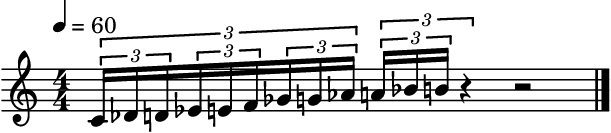

In [4]:
v1 = Voice([Note(m, F(1, 9)) for m in range(60, 72)])
v1.show()

El resultado deberia ser el siguiente

[maelzel:lilytools.py:333:renderLily:DEBUG] Rendering lilypond '/tmp/tmphf3ftqcw.ly' to '/tmp/tmpctlq38qw.png'
[maelzel:lilytools.py:192:findLilypond:DEBUG] findLilypond: searching via shutil.which
[maelzel:lilytools.py:195:findLilypond:DEBUG] ... found! lilypond path: /home/em/.local/bin/lilypond
[maelzel:lilytools.py:355:renderLily:DEBUG] Calling lilypond subprocess: ['/home/em/.local/bin/lilypond', '--png', '-o', '/tmp/tmpctlq38qw', '/tmp/tmp3obty0_v.ly']
[maelzel:lilytools.py:378:renderLily:DEBUG] lilypond executed OK
[maelzel:lilytools.py:383:renderLily:DEBUG] stderr: 
[maelzel:lilytools.py:384:renderLily:DEBUG]  Changing working directory to: `/tmp'
 Processing `/tmp/tmp3obty0_v.ly'
 Parsing...
 /tmp/tmp3obty0_v.ly:1: warning: no \version statement found, please add

 \version "2.25.11"

 for future compatibility
 Interpreting music...
 Preprocessing graphical objects...
 Finding the ideal number of pages...
 Fitting music on 1 page...
 Drawing systems...
 Converting to PNG...
 S

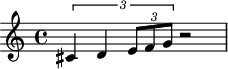

In [5]:
from maelzel.music import lilytools
lilytools.show(r"\tuplet 3/2 { cis'4 d'4 \tuplet 3/2 { e'8 f'8 g'8} } r2")


[maelzel.scoring:quant.py:1364:quantizeMeasure:DEBUG] Measure 4/4 is not filled (events=[«4C# 0:0.667 2/3♩», «4D 0.667:1.333 2/3♩», «4E 1.333:1.556 2/9♩», «4F 1.556:1.778 2/9♩», «4G 1.778:2 2/9♩»]). Filling gaps with silences


Beat: 0 - 1 (dur: 1)
Best 2 divisions: (quantized in 633.0µs)


error,div,snapped,slots,info
0.0000,"(3,)","[«4C# 0:0.667 2/3♩», «4D~ 0.667:1 1/3♩»]","[0, 2]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1636,"(5,)","[«4C# 0:0.6 3/5♩», «4D~ 0.6:1 2/5♩»]","[0, 3]","gridError=0.164, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:951:quantizeBeatBinary:DEBUG] Skipping (6,), gridError=0.23990831879010924 * 1.0 > minError=0.23627217518696303
[maelzel.scoring:quant.py:951:quantizeBeatBinary:DEBUG] Skipping (8,), gridError=0.24376132565106126 * 1.0 > minError=0.23627217518696303
[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (3, 9), divPenalty=0.05 * 0.1 > minError=0.005
[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (8, 9), divPenalty=0.0509902 * 0.1 > minError=0.005


Beat: 1 - 2 (dur: 1)
Best 3 divisions: (quantized in 25.1ms)


error,div,snapped,slots,info
0.0046,"(1, 3, 3)","[«~4D 0:0.333 1/3♩», «4E 0.333:0.556 2/9♩», «4F 0.556:0.778 2/9♩», «4G 0.778:1 2/9♩»]","[0, 1, 3, 5]","gridError=0, rhythmComplexity=0.112 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0050,"(9,)","[«~4D 0:0.333 1/3♩», «4E 0.333:0.556 2/9♩», «4F 0.556:0.778 2/9♩», «4G 0.778:1 2/9♩»]","[0, 3, 5, 7]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.05 (0.0005, divPenalty=0.05, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2363,"(5,)","[«~4D 0:0.4 2/5♩», «4E 0.4:0.6 1/5♩», «4F 0.6:0.8 1/5♩», «4G 0.8:1 1/5♩»]","[0, 2, 3, 4]","gridError=0.236, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(3/2, 
  «4E 1.333:1.556 2/9♩ 3/2,3/2»
  «4F~ 1.556:1.667 1/9♩ 3/2,3/2»
)
    Node(3/2, 
  «~4F 1.667:1.778 1/9♩ 3/2,3/2»
  «4G 1.778:2 2/9♩ 3/2,3/2»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(3/2, 
  «4E 1.333:1.556 2/9♩ 3/2,3/2»
  «4F 1.556:1.778 2/9♩ 3/2,3/2»
  «4G 1.778:2 2/9♩ 3/2,3/2»
)
[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(3/2, 
  «4C# 0:0.667 2/3♩ 3/2»
  «4D~ 0.667:1 1/3♩ 3/2»
)
    Node(3/2, 
  «~4D 1:1.333 1/3♩ 3/2»
  Node(3/2, 
    «4E 1.333:1.556 2/9♩ 3/2,3/2»
    «4F 1.556:1.778 2/9♩ 3/2,3/2»
    «4G 1.778:2 2/9♩ 3/2,3/2»
  )
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(3/2, 
  «4C# 0:0.667 2/3♩ 3/2»
  «4D 0.667:1.333 2/3♩ 3/2»
  Node(3/2, 
    «4E 1.333:1.556 2/9♩ 3/2,3/2»
    «4F 1.556:1.778 2/9♩ 3/2,3/2»
    «4G 1.778:2 2/9♩ 3/2,3/2»
  )
)
[maelzel.scoring:quant.py:1677:_mergeS

Voice([4C#:0.667♩, 4D:0.667♩, 4E:0.222♩, 4F:0.222♩, 4G:0.222♩])
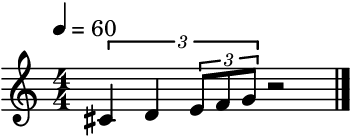

In [6]:
from maelzel.core import *

v1 = Voice([
    Note("4C#", F(2, 3)),
    Note("4D", F(2, 3)),
    Note("4E", F(2, 3)*F(1, 3)),
    Note("4F", F(2, 3)*F(1, 3)),
    Note("4G", F(2, 3)*F(1, 3)),
])
v1

[maelzel:lilytools.py:333:renderLily:DEBUG] Rendering lilypond '/tmp/tmp1rjm8oe4.ly' to '/tmp/tmpkt5w3bo5.png'
[maelzel:lilytools.py:192:findLilypond:DEBUG] findLilypond: searching via shutil.which
[maelzel:lilytools.py:195:findLilypond:DEBUG] ... found! lilypond path: /home/em/.local/bin/lilypond
[maelzel:lilytools.py:355:renderLily:DEBUG] Calling lilypond subprocess: ['/home/em/.local/bin/lilypond', '--png', '-o', '/tmp/tmpkt5w3bo5', '/tmp/tmpuwpjixz_.ly']
[maelzel:lilytools.py:378:renderLily:DEBUG] lilypond executed OK
[maelzel:lilytools.py:383:renderLily:DEBUG] stderr: 
[maelzel:lilytools.py:384:renderLily:DEBUG]  Changing working directory to: `/tmp'
 Processing `/tmp/tmpuwpjixz_.ly'
 Parsing...
 /tmp/tmpuwpjixz_.ly:1: warning: no \version statement found, please add

 \version "2.25.11"

 for future compatibility
 Interpreting music...
 Preprocessing graphical objects...
 Finding the ideal number of pages...
 Fitting music on 1 page...
 Drawing systems...
 Converting to PNG...
 S

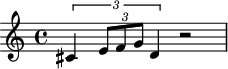

In [7]:
from maelzel.music import lilytools
lilytools.show(r"\tuplet 3/2 { cis'4 \tuplet 3/2 { e'8 f'8 g'8} d'4  } r2")


[maelzel.core:mobj.py:1844:resetImageCache:INFO] Resetting image cache
[maelzel.scoring:quant.py:1364:quantizeMeasure:DEBUG] Measure 4/4 is not filled (events=[«4C# 0:0.667 2/3♩», «4E 0.667:0.889 2/9♩», «4F 0.889:1.111 2/9♩», «4G 1.111:1.333 2/9♩», «4D 1.333:2 2/3♩»]). Filling gaps with silences
[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (1, 9), divPenalty=0.05 * 0.1 > minError=0.005


Beat: 0 - 1 (dur: 1)
Best 5 divisions: (quantized in 13.3ms)


error,div,snapped,slots,info
0.0030,"(1, 1, 3)","[«4C# 0:0.667 2/3♩», «4E 0.667:0.889 2/9♩», «4F~ 0.889:1 1/9♩»]","[0, 2, 4]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0050,"(9,)","[«4C# 0:0.667 2/3♩», «4E 0.667:0.889 2/9♩», «4F~ 0.889:1 1/9♩»]","[0, 6, 8]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.05 (0.0005, divPenalty=0.05, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1319,"(8,)","[«4C# 0:0.625 5/8♩», «4E 0.625:0.875 1/4♩», «4F~ 0.875:1 1/8♩»]","[0, 5, 7]","gridError=0.132, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1426,"(6,)","[«4C# 0:0.667 2/3♩», «4E 0.667:0.833 1/6♩», «4F~ 0.833:1 1/6♩»]","[0, 4, 5]","gridError=0.143, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2702,"(5,)","[«4C# 0:0.6 3/5♩», «4E 0.6:0.8 1/5♩», «4F~ 0.8:1 1/5♩»]","[0, 3, 4]","gridError=0.27, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (9, 1), divPenalty=0.05 * 0.1 > minError=0.005


Beat: 1 - 2 (dur: 1)
Best 5 divisions: (quantized in 10.9ms)


error,div,snapped,slots,info
0.0030,"(3, 1, 1)","[«~4F 0:0.111 1/9♩», «4G 0.111:0.333 2/9♩», «4D 0.333:1 2/3♩»]","[0, 1, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0050,"(9,)","[«~4F 0:0.111 1/9♩», «4G 0.111:0.333 2/9♩», «4D 0.333:1 2/3♩»]","[0, 1, 3]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.05 (0.0005, divPenalty=0.05, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1319,"(8,)","[«~4F 0:0.125 1/8♩», «4G 0.125:0.375 1/4♩», «4D 0.375:1 5/8♩»]","[0, 1, 3]","gridError=0.132, rhythmComplexity=0.298 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1426,"(6,)","[«~4F 0:0.167 1/6♩», «4G 0.167:0.333 1/6♩», «4D 0.333:1 2/3♩»]","[0, 1, 2]","gridError=0.143, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2702,"(5,)","[«~4F 0:0.2 1/5♩», «4G 0.2:0.4 1/5♩», «4D 0.4:1 3/5♩»]","[0, 1, 2]","gridError=0.27, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(3/2, 
  «4C# 0:0.667 2/3♩ 3/2»
  Node(3/2, 
    «4E 0.667:0.889 2/9♩ 3/2,3/2»
    «4F~ 0.889:1 1/9♩ 3/2,3/2»
  )
)
    Node(3/2, 
  Node(3/2, 
    «~4F 1:1.111 1/9♩ 3/2,3/2»
    «4G 1.111:1.333 2/9♩ 3/2,3/2»
  )
  «4D 1.333:2 2/3♩ 3/2»
)
[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(3/2, 
  «4E 0.667:0.889 2/9♩ 3/2,3/2»
  «4F~ 0.889:1 1/9♩ 3/2,3/2»
)
    Node(3/2, 
  «~4F 1:1.111 1/9♩ 3/2,3/2»
  «4G 1.111:1.333 2/9♩ 3/2,3/2»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(3/2, 
  «4E 0.667:0.889 2/9♩ 3/2,3/2»
  «4F 0.889:1.111 2/9♩ 3/2,3/2»
  «4G 1.111:1.333 2/9♩ 3/2,3/2»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(3/2, 
  «4C# 0:0.667 2/3♩ 3/2»
  Node(3/2, 
    «4E 0.667:0.889 2/9♩ 3/2,3/2»
    «4F 0.889:1.111 2/9♩ 3/2,3/2»
    «4G 1.111:1.333 2/9♩ 3/2,3/2»
  )
  «4D 1.333:2 2/3♩ 3/2»
)
[maelzel.scorin

Voice([4C#:0.667♩, 4E:0.222♩, 4F:0.222♩, 4G:0.222♩, 4D:0.667♩])
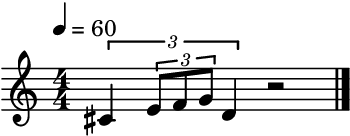

In [8]:
from maelzel.core import *
cfg = getConfig()

# The value of the min beat syncopation determines which tuplets can be merged across the beat. Set it
# low to allow more syncopations, set it high to only allow long duration syncopations
cfg['quant.syncopationMinBeatFraction'] = F(1, 6)

v1 = Voice([
    Note("4C#", F(2, 3)),
    Note("4E", F(2, 3)*F(1, 3)),
    Note("4F", F(2, 3)*F(1, 3)),
    Note("4G", F(2, 3)*F(1, 3)),
    Note("4D", F(2, 3)),
])
v1

[maelzel.scoring:quant.py:1364:quantizeMeasure:DEBUG] Measure 4/4 is not filled (events=[«4C# 0:0.667 2/3♩», «4D 0.667:1.333 2/3♩», «4E 1.333:2 2/3♩», «4D# 2:2.222 2/9♩», «4F 2.222:2.444 2/9♩», «4G 2.444:2.667 2/9♩», «4A 2.667:3 1/3♩»]). Filling gaps with silences


Beat: 0 - 1 (dur: 1)
Best 2 divisions: (quantized in 427.0µs)


error,div,snapped,slots,info
0.0000,"(3,)","[«4C# 0:0.667 2/3♩», «4D~ 0.667:1 1/3♩»]","[0, 2]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1636,"(5,)","[«4C# 0:0.6 3/5♩», «4D~ 0.6:1 2/5♩»]","[0, 3]","gridError=0.164, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


Beat: 1 - 2 (dur: 1)
Best 2 divisions: (quantized in 166.4µs)


error,div,snapped,slots,info
0.0000,"(3,)","[«~4D 0:0.333 1/3♩», «4E 0.333:1 2/3♩»]","[0, 1]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.1636,"(5,)","[«~4D 0:0.4 2/5♩», «4E 0.4:1 3/5♩»]","[0, 2]","gridError=0.164, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:951:quantizeBeatBinary:DEBUG] Skipping (6,), gridError=0.23990831879010924 * 1.0 > minError=0.23627217518696303
[maelzel.scoring:quant.py:951:quantizeBeatBinary:DEBUG] Skipping (8,), gridError=0.24376132565106126 * 1.0 > minError=0.23627217518696303
[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (9, 3), divPenalty=0.05 * 0.1 > minError=0.005
[maelzel.scoring:quant.py:942:quantizeBeatBinary:DEBUG] Skipping (9, 8), divPenalty=0.0509902 * 0.1 > minError=0.005


Beat: 2 - 3 (dur: 1)
Best 3 divisions: (quantized in 20.3ms)


error,div,snapped,slots,info
0.0046,"(3, 3, 1)","[«4D# 0:0.222 2/9♩», «4F 0.222:0.444 2/9♩», «4G 0.444:0.667 2/9♩», «4A 0.667:1 1/3♩»]","[0, 2, 4, 6]","gridError=0, rhythmComplexity=0.112 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0050,"(9,)","[«4D# 0:0.222 2/9♩», «4F 0.222:0.444 2/9♩», «4G 0.444:0.667 2/9♩», «4A 0.667:1 1/3♩»]","[0, 2, 4, 6]","gridError=0, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.05 (0.0005, divPenalty=0.05, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.2363,"(5,)","[«4D# 0:0.2 1/5♩», «4F 0.2:0.4 1/5♩», «4G 0.4:0.6 1/5♩», «4A 0.6:1 2/5♩»]","[0, 1, 2, 3]","gridError=0.236, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(3/2, 
  «4C# 0:0.667 2/3♩ 3/2»
  «4D~ 0.667:1 1/3♩ 3/2»
)
    Node(3/2, 
  «~4D 1:1.333 1/3♩ 3/2»
  «4E 1.333:2 2/3♩ 3/2»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(3/2, 
  «4C# 0:0.667 2/3♩ 3/2»
  «4D 0.667:1.333 2/3♩ 3/2»
  «4E 1.333:2 2/3♩ 3/2»
)
[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(3/2, 
  «4D# 2:2.222 2/9♩ 3/2,3/2»
  «4F~ 2.222:2.333 1/9♩ 3/2,3/2»
)
    Node(3/2, 
  «~4F 2.333:2.444 1/9♩ 3/2,3/2»
  «4G 2.444:2.667 2/9♩ 3/2,3/2»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(3/2, 
  «4D# 2:2.222 2/9♩ 3/2,3/2»
  «4F 2.222:2.444 2/9♩ 3/2,3/2»
  «4G 2.444:2.667 2/9♩ 3/2,3/2»
)
[maelzel.scoring:quant.py:1683:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(3/2, 
  «4C# 0:0.667 2/3♩ 3/2»
  «4D 0.667:1.333 2/3♩ 3/2»
  «4E 1.333:2 2/3♩ 3/2»
)
Node(3/2, 
  Node(3/2, 
    «4D# 2:2.222 2/9♩ 3/2,3/2»

Voice([4C#:0.667♩, 4D:0.667♩, 4E:0.667♩, 4D#:0.222♩, 4F:0.222♩, 4G:0.222♩, 4A:0.333♩])
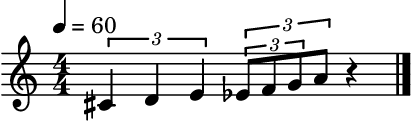

In [9]:
v1 = Voice([
    Note("4C#", F(2, 3)),
    Note("4D",  F(2, 3)),
    Note("4E",  F(2, 3)),
    Note("4D#", F(2,3)*F(1,3)),
    Note("4F",  F(2,3)*F(1,3)),
    Note("4G",  F(2,3)*F(1,3)),
    Note("4A", F(1, 3))
])
v1

[maelzel.scoring:quant.py:1364:quantizeMeasure:DEBUG] Measure 4/4 is not filled (events=[«4C 0:1 1♩», «4D 1:2.016 65/64♩», «4E 2.016:3.031 65/64♩»]). Filling gaps with silences
[maelzel.scoring:quant.py:968:quantizeBeatBinary:DEBUG] Skipping (7,), totalError=0.05512875622241527 > minError=0.05509246557044339
[maelzel.scoring:quant.py:968:quantizeBeatBinary:DEBUG] Skipping (11,), totalError=0.05775101525194592 > minError=0.05509246557044339
[maelzel.scoring:quant.py:968:quantizeBeatBinary:DEBUG] Skipping (4,), totalError=0.055101540474205346 > minError=0.05509246557044339
[maelzel.scoring:quant.py:968:quantizeBeatBinary:DEBUG] Skipping (6,), totalError=0.055101540474205346 > minError=0.05509246557044339


Beat: 2 - 3 (dur: 1)
Best 4 divisions: (quantized in 10.2ms)


error,div,snapped,slots,info
0.0551,"(1,)","[«~4D 0:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 64)}», «4E~ 0:1 1♩»]","[0, 0]","gridError=0.0551, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0551,"(2,)","[«~4D 0:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 64)}», «4E~ 0:1 1♩»]","[0, 0]","gridError=0.0551, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0551,"(3,)","[«~4D 0:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 64)}», «4E~ 0:1 1♩»]","[0, 0]","gridError=0.0551, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0569,"(5,)","[«~4D 0:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 64)}», «4E~ 0:1 1♩»]","[0, 0]","gridError=0.0551, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:968:quantizeBeatBinary:DEBUG] Skipping (7,), totalError=0.05512875622241527 > minError=0.05509246557044339
[maelzel.scoring:quant.py:968:quantizeBeatBinary:DEBUG] Skipping (11,), totalError=0.05775101525194592 > minError=0.05509246557044339


Beat: 3 - 4 (dur: 1)
Best 7 divisions: (quantized in 5.0ms)


error,div,snapped,slots,info
0.0192,"(7, 1, 1, 1)","[«~4E 0:0.036 1/28♩», «rest 0.036:1 27/28♩»]","[0, 1]","gridError=0.0176, rhythmComplexity=0.224 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.03 (0.0003, divPenalty=0.03, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0233,"(9, 1, 1)","[«~4E 0:0.037 1/27♩», «rest 0.037:1 26/27♩»]","[0, 1]","gridError=0.0214, rhythmComplexity=0.224 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.0583 (0.0005831, divPenalty=0.05, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0.03)"
0.0340,"(8, 1, 1)","[«~4E 0:0.042 1/24♩», «rest 0.042:1 23/24♩»]","[0, 1]","gridError=0.0332, rhythmComplexity=0.224 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.01 (0.0001, divPenalty=0.01, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0437,"(11, 1)","[«~4E 0:0.045 1/22♩», «rest 0.045:1 21/22♩»]","[0, 1]","gridError=0.0419, rhythmComplexity=0.224 (numNotesAcrossSubdivs=1, numTies=0), divPenalty=0.1 (0.001, divPenalty=0.1, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0551,"(1,)","[«~4E 0:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 32)}», «rest 0:1 1♩»]","[0, 0]","gridError=0.0551, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0551,"(2,)","[«~4E 0:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 32)}», «rest 0:1 1♩»]","[0, 0]","gridError=0.0551, rhythmComplexity=0 (numNotesAcrossSubdivs=0, numTies=0), divPenalty=0 (0, divPenalty=0, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"
0.0569,"(5,)","[«~4E 0:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 32)}», «rest 0:1 1♩»]","[0, 0]","gridError=0.0551, rhythmComplexity=0.447 (numNotesAcrossSubdivs=0, numTies=1), divPenalty=0.02 (0.0002, divPenalty=0.02, cardinalityPenalty=0, numSubdivsPenalty=0, levelPenalty=0)"


[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «4C 0:1 1♩»
)
    Node(1/1, 
  «4D~ 1:2 1♩»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «4C 0:1 1♩»
  «4D~ 1:2 1♩»
)
[maelzel.scoring:quant.py:1683:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(1/1, 
  «4C 0:1 1♩»
  «4D~ 1:2 1♩»
)
Node(1/1, 
  «~4D 2:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 64)}»
  «4E~ 2:3 1♩»
)
----> Rel. duration of «~4D 2:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 64)}» too short to merge with «4D~ 1:2 1♩». Min side duration: 0.0833333
[maelzel.scoring:quant.py:1683:_mergeSiblings:DEBUG] Nodes cannot merge: 
Node(1/1, 
  «~4D 2:grace properties={'.snappedGracenote': True, '.originalDuration': Fraction(1, 64)}»
  «4E~ 2:3 1♩»
)
Node(1/1, 
  Node(7/4, 
    «~4E 3:3.036 1/28♩ 7/4»
    «rest 3.036:3.25 3/14♩ 7/4»
  )
  «rest 3.25:4 3/4♩»
)
----> A Node cannot merge

Score(2 voices)
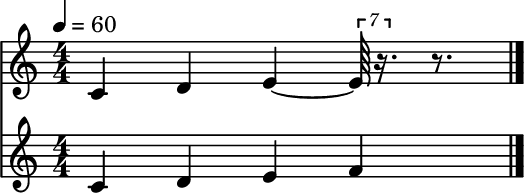

In [10]:
v1 = Voice([
    "4C:1",
    "4D:1+1/64",
    "4E:1+1/64"
])
v2 = Voice([
    "4C:1",
    "4D:1",
    "4E:1",
    "4F:1"
])
sc = Score([v1, v2])
sc

In [11]:
from maelzel.core import *
from maelzel.scoring import logger as sclogger
sclogger.setLevel("DEBUG")
cfg = getConfig()
cfg['.quant.debug'] = False

v = Voice(r"""
r:1.5
4g,4b~:0.5
4g,4b~:1
4g,4b:1
""")
q = v.quantizedScore()
#q.dump()
#v

[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «rest 0:1 1♩»
)
    Node(1/1, 
  «rest 1:1.5 1/2♩»
  «[4G 4B]~ 1.5:2 1/2♩»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «rest 0:1.5 3/2♩»
  «[4G 4B]~ 1.5:2 1/2♩»
)
[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «rest 0:1.5 3/2♩»
  «[4G 4B]~ 1.5:2 1/2♩»
)
    Node(1/1, 
  «~[4G 4B]~ 2:3 1♩»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «rest 0:1.5 3/2♩»
  «[4G 4B]~ 1.5:3 3/2♩»
)
[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «rest 0:1.5 3/2♩»
  «[4G 4B]~ 1.5:3 3/2♩»
)
    Node(1/1, 
  «~[4G 4B] 3:4 1♩»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «rest 0:1.5 3/2♩»
  «[4G 4B]~ 1.5:3 3/2♩»
  «~[4G 4B] 3:4 1♩»
)
[maelzel.scoring:node.py:808:_splitNotationAtBoundary:DEBUG] Splitting node (off

[maelzel:lilytools.py:192:findLilypond:DEBUG] findLilypond: searching via shutil.which
[maelzel:lilytools.py:195:findLilypond:DEBUG] ... found! lilypond path: /home/em/.local/bin/lilypond
[maelzel.scoring:renderlily.py:1141:write:DEBUG] Rendering lilypond '/home/em/.cache/tmpeo0lvhnr/oywv0n1o.ly' to '/home/em/.cache/tmpeo0lvhnr/oywv0n1o.png'
[maelzel:lilytools.py:333:renderLily:DEBUG] Rendering lilypond '/home/em/.cache/tmpeo0lvhnr/oywv0n1o.ly' to '/home/em/.cache/tmpeo0lvhnr/oywv0n1o.png'
[maelzel:lilytools.py:192:findLilypond:DEBUG] findLilypond: searching via shutil.which
[maelzel:lilytools.py:195:findLilypond:DEBUG] ... found! lilypond path: /home/em/.local/bin/lilypond
[maelzel:lilytools.py:355:renderLily:DEBUG] Calling lilypond subprocess: ['/home/em/.local/bin/lilypond', '--png', '-o', '/home/em/.cache/tmpeo0lvhnr/oywv0n1o', '-dresolution=200', '/tmp/tmp4eclxoym.ly']
[maelzel:lilytools.py:378:renderLily:DEBUG] lilypond executed OK
[maelzel:lilytools.py:383:renderLily:DEBUG] stde

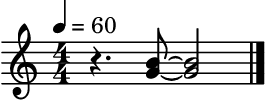

In [12]:
q.show()

[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «rest 0:1 1♩»
)
    Node(1/1, 
  «rest 1:1.5 1/2♩»
  «[4G 4B]~ 1.5:2 1/2♩»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «rest 0:1.5 3/2♩»
  «[4G 4B]~ 1.5:2 1/2♩»
)
[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «rest 0:1.5 3/2♩»
  «[4G 4B]~ 1.5:2 1/2♩»
)
    Node(1/1, 
  «~[4G 4B]~ 2:3 1♩»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «rest 0:1.5 3/2♩»
  «[4G 4B]~ 1.5:3 3/2♩»
)
[maelzel.scoring:quant.py:1677:_mergeSiblings:DEBUG] Nodes can merge: 
    Node(1/1, 
  «rest 0:1.5 3/2♩»
  «[4G 4B]~ 1.5:3 3/2♩»
)
    Node(1/1, 
  «~[4G 4B] 3:4 1♩ attachments=[Articulation(kind=accent)]»
)
[maelzel.scoring:quant.py:1680:_mergeSiblings:DEBUG] ---- Merged node:
    Node(1/1, 
  «rest 0:1.5 3/2♩»
  «[4G 4B]~ 1.5:3 3/2♩»
  «~[4G 4B] 3:4 1♩ attachments=[Articulation(kind=accent)]»
)


Voice([Rest:1.5♩, ‹4G 4B 0.5♩›, ‹4G 4B 1♩›, ‹4G 4B 1♩›])
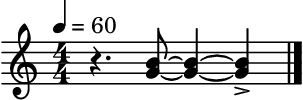

In [13]:
v = Voice(r"""
r:1.5
4g,4b~:0.5
4g,4b~:1
4g,4b:1:accent
""")
v